In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

In [2]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

In [3]:

runs = ['ctsmjuly20_4x5_DDcont_cush','ctsmjuly20_4x5_DDcont_cush_hf','ctsmjuly20_4x5_DDcont_cush_hf_smp',
       'ctsmjuly20_4x5_DDcont_cush_hf_smp_initw']
scratch = '/glade/scratch/rfisher/'


In [4]:
run = runs[3]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
arc = scratch + '/' + run + '/run/' 
print(arc)
f1=(arc +run+'.clm2.h0.0001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.0002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.0003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.0004-01-01-00000.nc')
f5=(arc +run+'.clm2.h0.0005-01-01-00000.nc')
print(f4)
ds0 = xr.open_mfdataset([f2, f3, f4], decode_times=False,parallel=True)
#ds_2003 = xr.open_mfdataset(arc + '2003*', drop_variables=drop, decode_times=False)
arc = scratch + 'archive/' + run + '/lnd/hist/'+ run + '.clm2.h0.' 
#arc = scratch + '/' + run + '/run/' + run + '.clm2.h0.' 
#ds0= xr.open_mfdataset(arc + '2002*', drop_variables=drop, decode_times=False)


/glade/scratch/rfisher//ctsmjuly20_4x5_DDcont_cush_hf_smp_initw/run/
/glade/scratch/rfisher//ctsmjuly20_4x5_DDcont_cush_hf_smp_initw/run/ctsmjuly20_4x5_DDcont_cush_hf_smp_initw.clm2.h0.0004-01-01-00000.nc


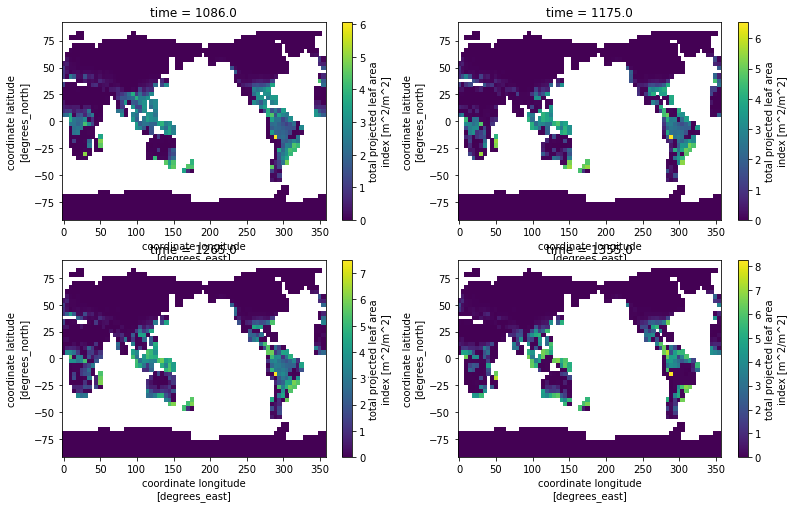

In [5]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
offs=720
ds0.TLAI.isel(time=offs+1).plot(ax=ax0)
ds0.TLAI.isel(time=offs+90).plot(ax=ax1)
ds0.TLAI.isel(time=offs+180).plot(ax=ax2)
ds0.TLAI.isel(time=offs+270).plot(ax=ax3)

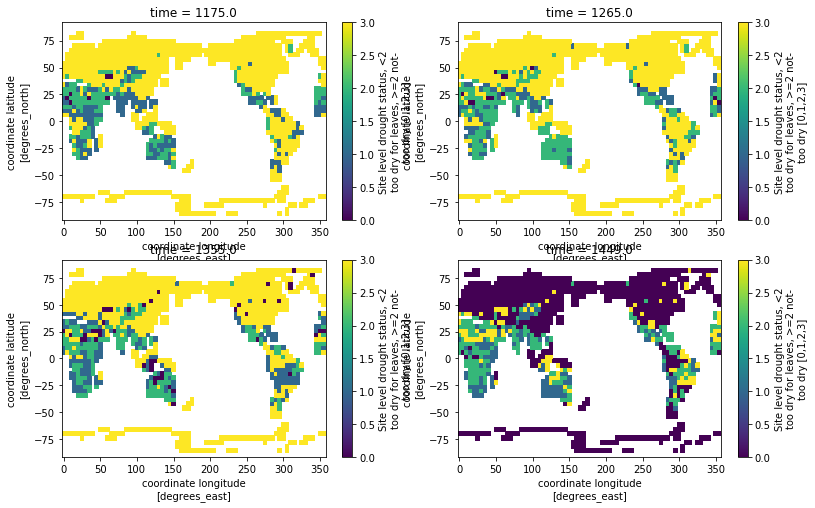

In [17]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
offs=720
ds0.SITE_DROUGHT_STATUS.isel(time=offs+90).plot(ax=ax0)
ds0.SITE_DROUGHT_STATUS.isel(time=offs+180).plot(ax=ax1)
ds0.SITE_DROUGHT_STATUS.isel(time=offs+270).plot(ax=ax2)
ds0.SITE_DROUGHT_STATUS.isel(time=offs+364).plot(ax=ax3)

In [7]:
lats=range(36,37)
lons=range(51,53)
print(ds0.lat[lats])
print(ds0.lon[lons])
lati=-10
loni=25

<xarray.DataArray 'lat' (lat: 1)>
array([54.], dtype=float32)
Coordinates:
  * lat      (lat) float32 54.0
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north
<xarray.DataArray 'lon' (lon: 2)>
array([255., 260.], dtype=float32)
Coordinates:
  * lon      (lon) float32 255.0 260.0
Attributes:
    long_name:  coordinate longitude
    units:      degrees_east


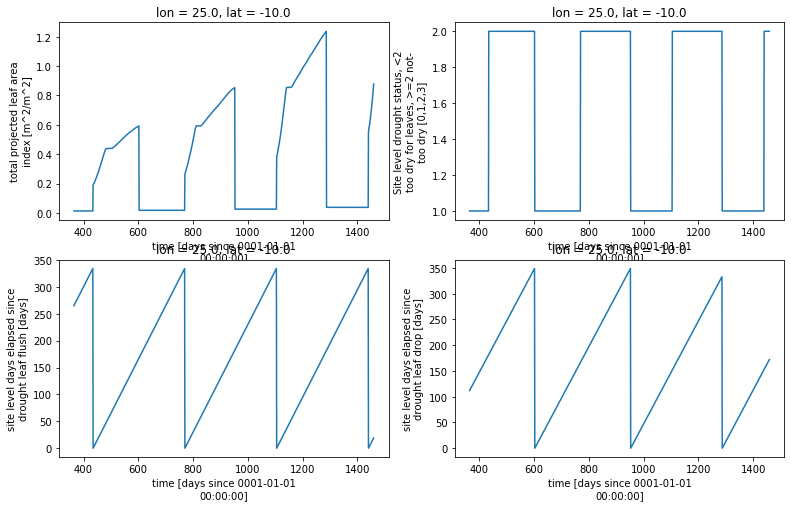

In [8]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
ymx=1

ds0.TLAI.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax0,x='time')
ds0.SITE_DROUGHT_STATUS.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax1,x='time')
ds0.SITE_DAYSINCE_DROUGHTLEAFON.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax2,x='time')
ds0.SITE_DAYSINCE_DROUGHTLEAFOFF.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax3,x='time')



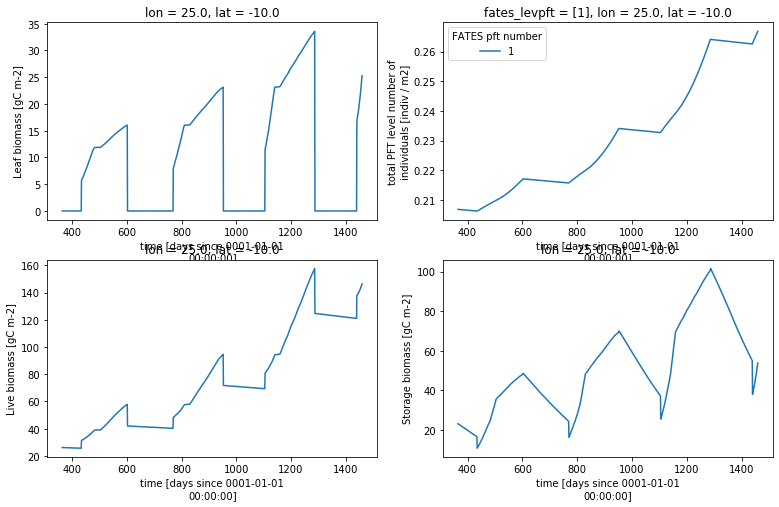

In [9]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
ymx=1

ds0.ED_bleaf.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax0,x='time')
ds0.PFTnindivs.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax1,x='time')
ds0.ED_balive.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax2,x='time')
ds0.ED_bstore.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax3,x='time')



In [10]:
plt.rcParams['figure.figsize'] = [7, 4]
print(lati)
frac=np.divide(ds0.ED_bstore,ds0.ED_bleaf)
#frac.sel(lat=lati,  lon=loni).plot.line(x='time',add_legend=False,ylim=(0,4))

-10


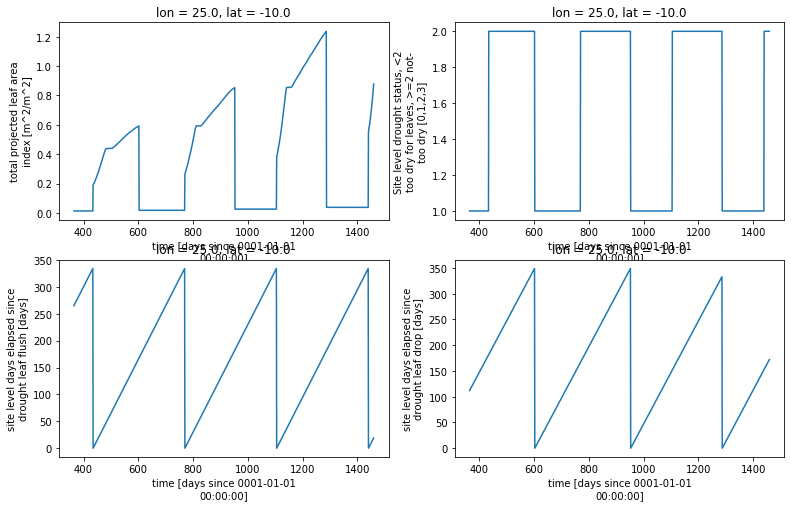

In [11]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)

ds0.TLAI.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax0,x='time')
ds0.SITE_DROUGHT_STATUS.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax1,x='time')
ds0.SITE_DAYSINCE_DROUGHTLEAFON.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax2,x='time')
ds0.SITE_DAYSINCE_DROUGHTLEAFOFF.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax3,x='time')


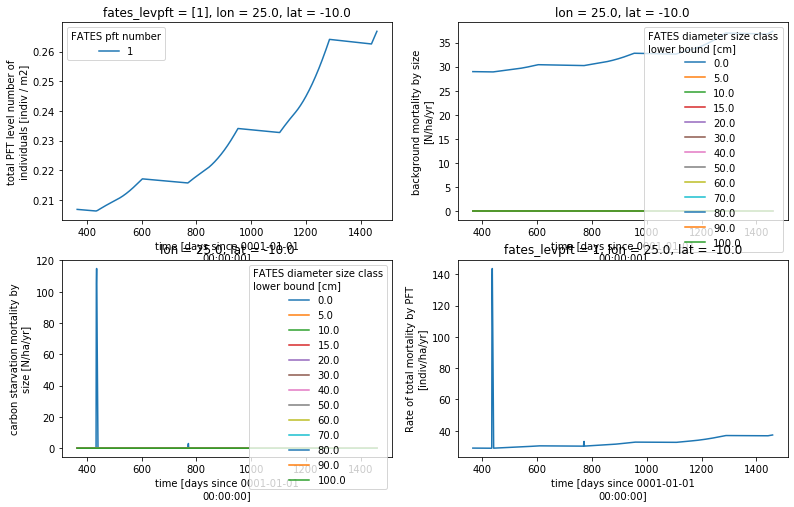

In [12]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
ymax=1
#print(ds0)
ds0.PFTnindivs.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax0,x='time')
ds0.M1_SCLS.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax1,x='time')
ds0.M3_SCLS.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax2,x='time')
ds0.MORTALITY.sel(lat=lati,lon=loni,fates_levpft=0,method='nearest').plot.line(ax=ax3,x='time')


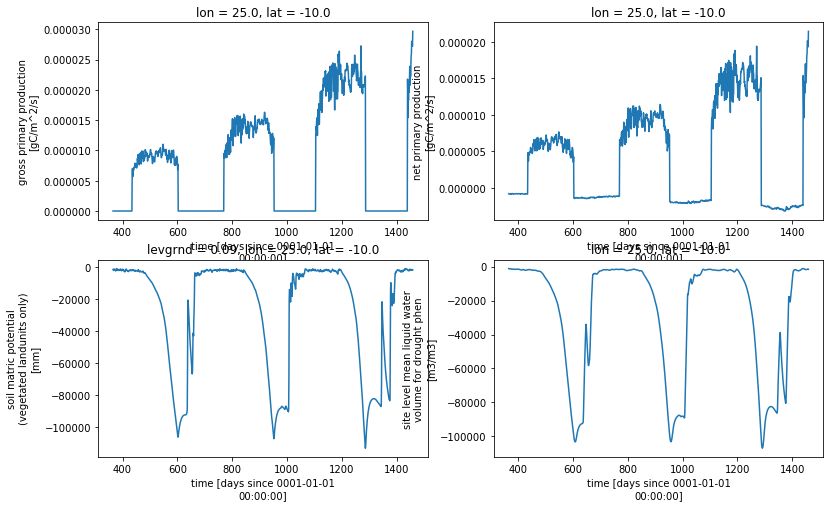

In [14]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
ymax=1

ds0.GPP.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax0,x='time')
ds0.NPP.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax1,x='time')
ds0.SMP.sel(lat=lati,lon=loni,method='nearest',levgrnd=0.08).plot.line(ax=ax2,x='time')
ds0.SITE_MEANLIQVOL_DROUGHTPHEN.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax3,x='time')



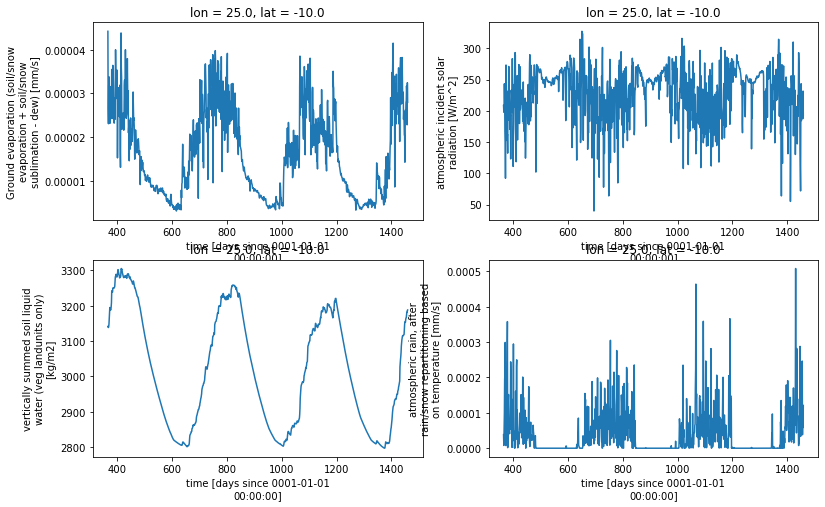

In [15]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
ymax=1

ds0.QSOIL.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax0,x='time')
ds0.FSDS.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax1,x='time')
ds0.TOTSOILLIQ.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax2,x='time')
ds0.RAIN.sel(lat=lati,lon=loni,method='nearest').plot.line(ax=ax3,x='time')



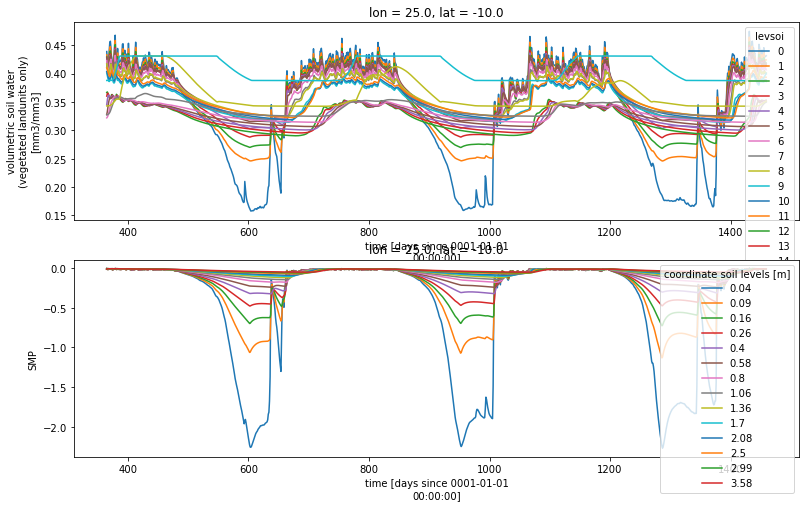

In [16]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1]) = plt.subplots(ncols=1, nrows=2)
#smps=ds0.SMP.sel(lat=lati,lon=loni,method='nearest',levgrnd=0.08)
smps=ds0.SMP.sel(lat=lati,lon=loni,method='nearest')
vwcs=ds0.H2OSOI.sel(lat=lati,lon=loni,method='nearest')
#vwcl=vwcs.isel(levsoi=4)
smps=np.multiply(smps,1/100000)
smps=smps.isel(levgrnd=slice(1, 15))
vwcs.plot.line(ax=ax0,x='time')
smps.plot.line(ax=ax1,x='time')
